#CIC260 - Inteligência Artificial

##Tales Oliveira
##Tarefa 05

###============================================================================================
###Importando bibliotecas

In [20]:
import numpy as np # Biblioteca numérica.

In [21]:
import matplotlib.pyplot as plt # A biblioteca matplotlib é utilizada para visualizar parte do conjunto de dados.

In [53]:
from mlxtend.plotting import plot_decision_regions # Biblioteca utilizada para plotar a fronteira de decisão gerada.

###Definindo a classe Perceptron

In [85]:
class Perceptron(object):
    def __init__(self, tAprendizagem, nIteracoes, random_state=1):
        self.tAprendizagem = tAprendizagem # Taxa de aprendizagem
        self.nIteracoes = nIteracoes # Numero de iteracoes
        self.random_state = random_state # Gera números aleatórios

    # Função para o aprendizado a partir do número de amostras e número de atributos do conjunto     
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.nIteracoes):
            errors = 0
            for xi, target in zip(X, y):
                update = self.tAprendizagem * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # Função para calcular a entrada
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Função para obter o rótulo da classe utilizando função degrau
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

###============================================================================================

###SCIKIT-Learn

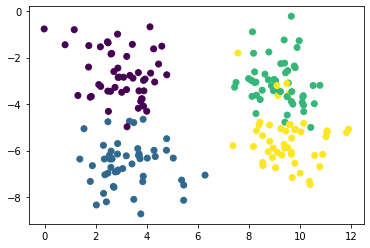

In [98]:
from sklearn.datasets import make_blobs

# AQUI OS PARÂMETROS DEVEM SER ALTERADOS PARA OBTER OS RESULTADOS.
# n_samples = número de amostras
# n_features = número de dimensoes
# centers = número de centros
# random_state = Gera números aleatórios
blobs = make_blobs(n_samples=200, n_features=2, centers=4, random_state=30)

# Plotando os dados
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

In [116]:
ppn = Perceptron(nIteracoes=100, tAprendizagem=0.003) # ALTERAR O NÚMERO DE ITERAÇÔES E A TAXA DE APRENDIZAGEM PARA OBTER DIFERENTES RESULTADOS.
X = blobs[0] # Entrada
y = blobs[1] # Saída

# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1

ppn.fit(X, y) # Treinar

### Esse trecho é utilizado para plotar o gráfico de atualizações por épocas, indicando quantas destas foram necessárias para os resultados convergirem.

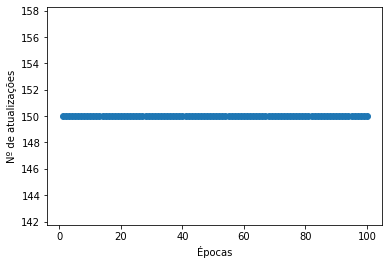

In [118]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

### Esse trecho é utilizado para plotar a fronteira de decisão.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


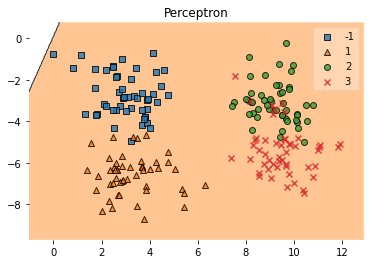

In [119]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()